## Your Title
### Your team number

### 1. Package loading
Put the required packages in the following cell.

In [1]:
from PIL import Image
import numpy as np
from IPython.display import display
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans # Our clustering algorithm
from sklearn.decomposition import PCA # Needed for dimension reduction
import matplotlib.pyplot as plt # Plotting 
import pandas as pd # Storing data convenieniently
from sklearn.manifold import Isomap
from sklearn.metrics import silhouette_score
import matplotlib.cm as cm


### 2. Visualisations of the Dataset
Put the code that reproduce the figures that you include in Section 2 Part B of your report under this section.

In [27]:
# visualization
# skip headers
header = None
# read csv file
pixels = pd.read_csv('product_images.csv')
# slice one img out
#(change pixels.iloc[[1]] to other number to have other imgs)
pixels = np.array(pixels.iloc[[1]], dtype='uint8')
pixels = pixels.reshape(28, 28)
image = Image.fromarray(pixels)
# display img
display(image)
image.save("pic1.png")

In [28]:
# visualization
# skip headers
header = None
# read csv file
pixels = pd.read_csv('product_images.csv')
# slice one img out
pixels = np.array(pixels.iloc[[68]], dtype='uint8')
pixels = pixels.reshape(28, 28)
image = Image.fromarray(pixels)
# display img
display(image)

In [29]:
# visualization
# skip headers
header = None
# read csv file
pixels = pd.read_csv('product_images.csv')
# slice one img out
pixels = np.array(pixels.iloc[[1345]], dtype='uint8')
pixels = pixels.reshape(28, 28)
image = Image.fromarray(pixels)
# display img
display(image)

In [30]:
# visualization
# skip headers
header = None
# read csv file
pixels = pd.read_csv('product_images.csv')
# slice one img out
pixels = np.array(pixels.iloc[[789]], dtype='uint8')
pixels = pixels.reshape(28, 28)
image = Image.fromarray(pixels)
# display img
display(image)

In [31]:
# visualization
# skip headers
header = None
# read csv file
pixels = pd.read_csv('product_images.csv')
# slice one img out
pixels = np.array(pixels.iloc[[8765]], dtype='uint8')
pixels = pixels.reshape(28, 28)
image = Image.fromarray(pixels)
# display img
display(image)

### **3. Recommendation Algorithm**
Put under this section the code that you use to construct the recommendation algorithm based on K-means. You can use subsections, e.g., 3.1, 3.2, to give better interpretations of your code. The code you include in the section should be able to reproduce the cluster labels you obtained and documented in your report. It should also correspond to the pseudo code you include in the Algo 1 under **Section III: Methods** of your report.

#### **3.1 KMeans without feature extraction**

pseudo code
elbow method
1. dataset = read csv file
2. add append = []
3. for loop for i in range(start cluster, end cluster)
4. kmeans for i cluster
5. kmeans fit in dataset
6. add inertia to append
7. plot graph

**https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/**

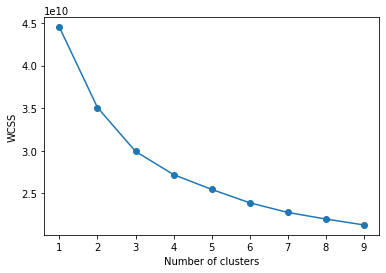

In [32]:
#read csv file
elbow_dataset = pd.read_csv(r'product_images.csv') # 读入数据
#create append
wcss = [] 
#for loop for i in range(start cluster, end cluster)
for i in range(1, 10): 
    #apply kmeans
    kmeans = KMeans(n_clusters = i, init = 'k-means++') 
    kmeans.fit(elbow_dataset) 
    wcss.append(kmeans.inertia_)
#plot graph
plt.plot(range(1, 10), wcss, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

#### **3.2 PCA Model (1st Feature Extraction)**

pseudo code
pca
1. dataset = read csv file
2. add pca = fit_predict dataset
3. plot graph
4. set variance ratio

**https://cinnipatel.medium.com/principal-component-analysis-python-a6214346cae7**

Minimum number of components that intersect a variance threshold of 95%: 181


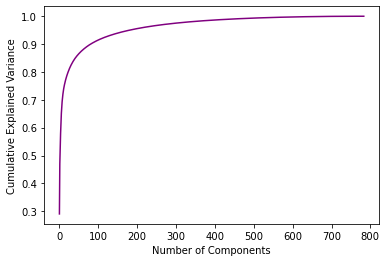

In [33]:
# dataset = read csv file
pca_dataset = pd.read_csv(r'product_images.csv')
# add pca = fit_predict dataset
pca = PCA().fit(pca_dataset)
# plot graph
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='purple')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
#set variance ratio
a = np.cumsum(pca.explained_variance_ratio_)
print("Minimum number of components that intersect a variance threshold of 95%:", [i for i in range(len(a)) if a[i] >= 0.95][0])

# using selected component to transform the data set
pca = PCA(n_components=181)
principalComponents = pca.fit_transform(pca_dataset)

# Putting components in a dataframe for later
PCA_components = pd.DataFrame(principalComponents)

**https://andrewmourcos.github.io/blog/2019/06/06/PCA.html**

pseudo code
apply model
1. set components and add a new parameter = fit dataset to model
2. add append = []
3. for loop for i in the list
4. cluster = apply kmeans for no. i
5. add labels = fit_predict dataset
6. add inertia to append
7. plot graph

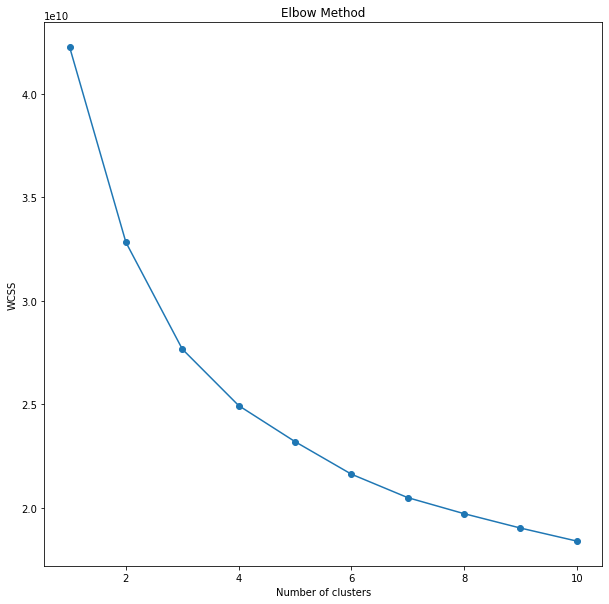

In [34]:
# set components and add a new parameter = fit dataset to model
pca = PCA(n_components=181)
principalComponents = pca.fit_transform(pca_dataset)

# Putting components in a dataframe for later
PCA_components = pd.DataFrame(principalComponents)
inertias = []

for i in range(1,11):
    model = KMeans(n_clusters = i, init = "k-means++")
    
    # Fit model to samples
    cluster_labels = model.fit(principalComponents)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

# plot graph
plt.figure(figsize=(10,10))
plt.plot(range(1,11), inertias, marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### **2.3 t-SNE Model**

**https://medium.com/jungle-book/automatic-feature-extraction-with-t-sne-62826ce09268**

pseudo code
elbow method
1. dataset = read csv file
2. set components and add a new parameter = fit dataset to model
3. add append = []
4. for loop for i in range(start cluster, end cluster)
5. kmeans for i cluster
6. kmeans fit in dataset_processed
7. add inertia to append
8. plot graph

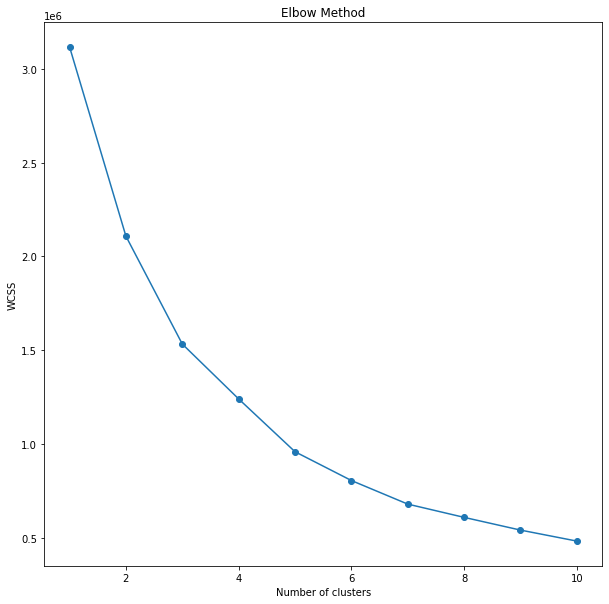

In [35]:
# Adopt from PCA model, change feature extraction method to t-SNE
# Applying t-SNE and finding optimal number of clusters for t-SNE k-Means model
# using Elbow Method
tsne_dataset = pd.read_csv(r'product_images.csv')
tsne_processed = TSNE(n_components=3).fit_transform(tsne_dataset)

# add append = []
wcss = []
# for loop for i in range(start cluster, end cluster)
for i in range(1,11):
    # kmeans for i cluster
    # kmeans fit in dataset_processed
    kmeans = KMeans(n_clusters = i, init = "k-means++")
    kmeans.fit(tsne_processed)
    # add inertia to append
    wcss.append(kmeans.inertia_)

# plot graph
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss, marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### **3.4 Manifold Learning**

**https://towardsdatascience.com/manifold-learning-t-sne-lle-isomap-made-easy-42cfd61f5183**

**https://scikit-learn.org/stable/modules/manifold.html**

pseudo code
apply model
1. dataset = read csv file
2. set components
3. and add a new parameter as processed data = fit dataset to model

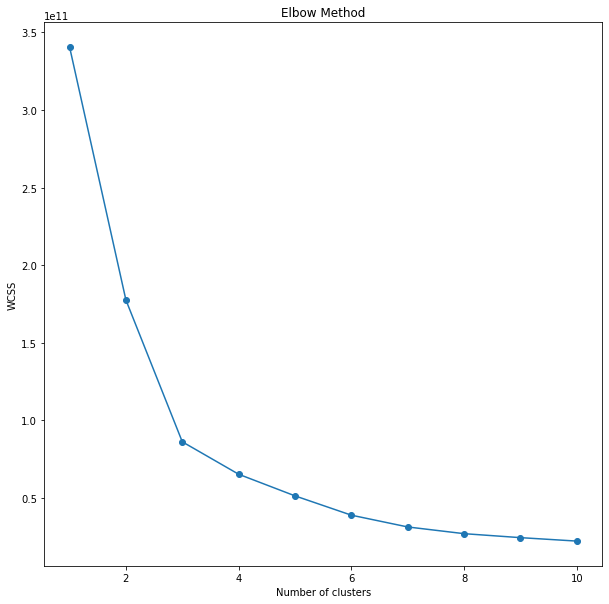

In [36]:
# Adopt from PCA model, change feature extraction method to t-SNE
# Applying t-SNE and finding optimal number of clusters for t-SNE k-Means model
# using Elbow Method
ml_dataset = pd.read_csv(r'product_images.csv')
ml_processed = Isomap(n_components=2).fit_transform(ml_dataset)
# add append = []
wcss = []
# for loop for i in range(start cluster, end cluster)
for i in range(1,11):
    # kmeans for i cluster
    # kmeans fit in dataset_processed
    kmeans = KMeans(n_clusters = i, init = "k-means++")
    kmeans.fit(ml_processed)
    # add inertia to append
    wcss.append(kmeans.inertia_)

# plot graph
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss, marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### 3. Evaluation of the Algorithm
Put under this section the code that you use to evaluate the quality of your recommendation algorithm based on K-means. The code you include in the section should be able to reproduce Table 1 and results you documented under **Section IV: Results** of your report. You can also put under this section the code of other evaluation approaches, e.g, visualisations, that you presented in the report. 

#### **Finding score for regular Kmeans**

**https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html**

pseudo code
finding silhouette score
1. create a list store no. of clusters
2. for loop for i in the list
3. cluster = apply kmeans for no. i
4. add labels = fit_predict dataset
5. compute silhouette score
6. print silhouette score

The best cluster for silhouette is 2 The score is : 0.195025086839199
The best cluster for calinski harabasz is 2 The score is : 2690.823058183247
The best cluster for Davies-Bouldin Index is 3 The score is : 1.7105500189773277


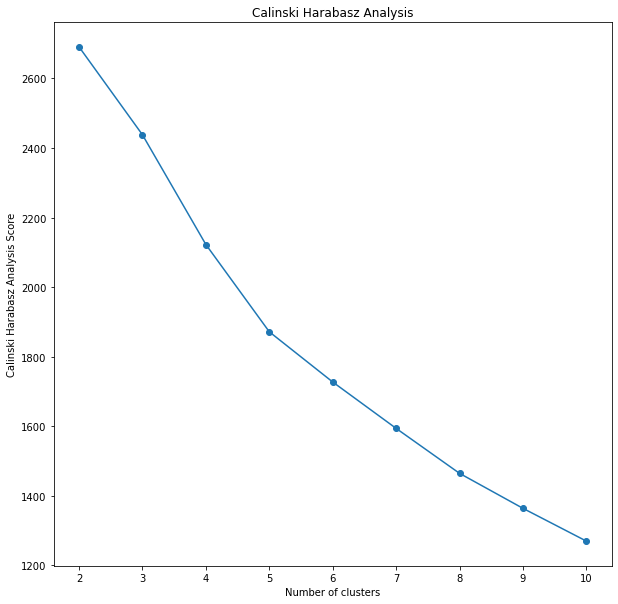

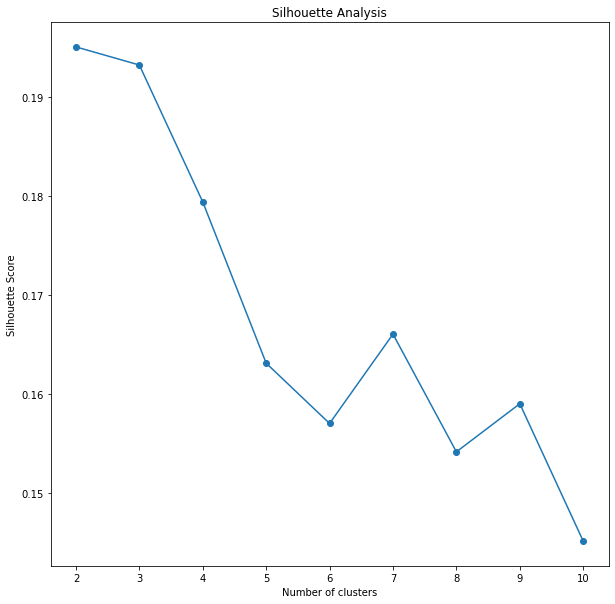

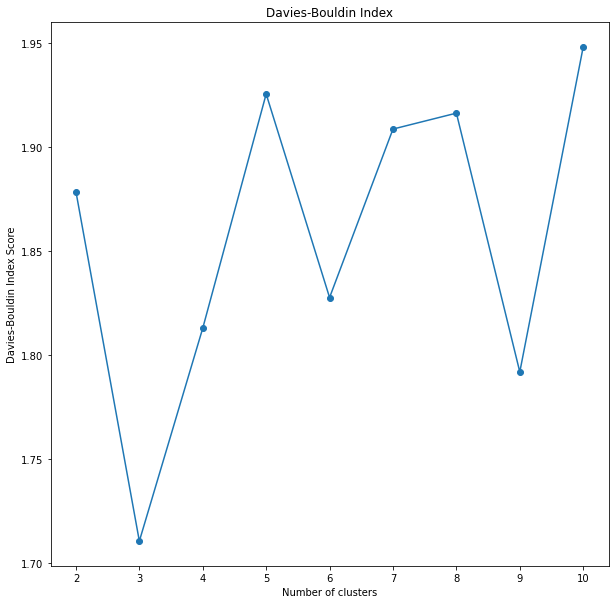

,n_clusters,silhouette_score,calinski_harabasz_score,Davies-Bouldin Index
0,2.0,0.195025,2690.823058,1.878442
1,3.0,0.193198,2438.037132,1.710550
2,4.0,0.179374,2122.575895,1.812852
3,5.0,0.163097,1871.710876,1.925360
4,6.0,0.157011,1727.364797,1.827578
5,7.0,0.166029,1594.015820,1.908511
6,8.0,0.154145,1464.730491,1.916168
7,9.0,0.159002,1364.141428,1.791829
8,10.0,0.145135,1269.898283,1.947985


In [37]:
# set ranges of clusters 
# (the number above 10 is much worse in the score, so we reduce it to 10 clusters to reduce runtime)
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
#create empty append to store scores
scoreNormal = []
scoreNormal2 = []
scoreNormal3 = []
B_sil = -10
B_n = -1
B_cal = -10
B_nc = -1
B_db = 10000
B_nd = -1

#
cluster = np.zeros((9,1))
silhouette = np.zeros((9,1))
calinski = np.zeros((9,1))
Davies_Bouldin = np.zeros((9,1))

# for loop to travel every clusters aviliable
for n_clusters in range_n_clusters:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(elbow_dataset)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(elbow_dataset, cluster_labels)
    # Compute the scores for calinski and davies_bouldin
    cal = metrics.calinski_harabasz_score(elbow_dataset, cluster_labels)

    db_baseline = davies_bouldin_score(elbow_dataset, cluster_labels)
    
    #
    f = n_clusters - 2
    
    #
    cluster[(f),:] = n_clusters
    silhouette[(f),:] = silhouette_avg
    calinski[(f),:] = cal
    Davies_Bouldin[(f),:] = db_baseline

    # select the best cluster in each evaluation method
    if(silhouette_avg>B_sil):
        B_sil = silhouette_avg
        B_n = n_clusters

    if(cal>B_cal):
        B_cal = cal
        B_nc = n_clusters

    if(db_baseline<B_db):
        B_db = db_baseline
        B_nd = n_clusters

    # add scores to appends
    scoreNormal.append(cal)
    scoreNormal2.append(silhouette_avg)
    scoreNormal3.append(db_baseline)
    
#
dfcluster = pd.DataFrame(cluster, columns = ['n_clusters'])
dfsilhouette = pd.DataFrame(silhouette, columns = ['silhouette_score'])
dfcalinski = pd.DataFrame(calinski, columns = ['calinski_harabasz_score'])
dfdavies_bouldin_score = pd.DataFrame(Davies_Bouldin, columns = ['Davies-Bouldin Index'])
df1 = pd.concat([dfcluster,dfsilhouette,dfcalinski], axis = 1)
df2 = pd.concat([df1,dfdavies_bouldin_score], axis = 1)
    
# print the best score
print(
    "The best cluster for silhouette is",
    B_n,
    "The score is :",
    B_sil,
    )

print(
    "The best cluster for calinski harabasz is",
    B_nc,
    "The score is :",
    B_cal,
    )

print(
    "The best cluster for Davies-Bouldin Index is",
    B_nd,
    "The score is :",
    B_db,
    )


#Plot the results 
plt.figure(figsize=(10,10))
plt.plot(range_n_clusters, scoreNormal, marker = 'o')
plt.title('Calinski Harabasz Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski Harabasz Analysis Score')
plt.show()

plt.figure(figsize=(10,10))
plt.plot(range_n_clusters, scoreNormal2, marker = 'o')
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

plt.figure(figsize=(10,10))
plt.plot(range_n_clusters, scoreNormal3, marker = 'o')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Index Score')
plt.show()

df2


In [38]:
# Fitting regular k-Means model with optimal number of clusters
# computing cluster quality metrics
# the best cluster in this case is 4
kmeans = KMeans(n_clusters = 4).fit(elbow_dataset)
labels = kmeans.labels_

#Number of clusters
elbow_clusters = 4

# Cluster Quality Metric #1 - Silhouette Coefficient
sc_baseline = metrics.silhouette_score(elbow_dataset, labels, metric='euclidean')

# Cluster Quality Metric #2 - Calinski-Harabasz Index
ch_baseline = metrics.calinski_harabasz_score(elbow_dataset, labels)

# Cluster Quality Metric #3 - Davies-Bouldin Index
db_baseline = davies_bouldin_score(elbow_dataset, labels)

scores = pd.DataFrame(columns = ["Model", "Final clusters", "Silhouette Coefficient", "Calinski-Harabasz Index", "Davies-Bouldin Index"])
scores = scores.append({"Model":"Baseline k-Means", "Final clusters":elbow_clusters, "Silhouette Coefficient":sc_baseline,
                       "Calinski-Harabasz Index":ch_baseline, "Davies-Bouldin Index":db_baseline}, ignore_index = True)
scores

,Model,Final clusters,Silhouette Coefficient,Calinski-Harabasz Index,Davies-Bouldin Index
0,Baseline k-Means,4,0.179381,2122.575239,1.812911


#### **Finding score for PCA Kmeans**

**https://365datascience.com/tutorials/python-tutorials/pca-k-means/**

**https://realpython.com/k-means-clustering-python/**

pseudo code
finding silhouette score
1. create a list store no. of clusters and a empty append
2. for loop for i in the list
3. cluster = apply kmeans for no. i
4. add labels = fit_predict dataset_processed
5. compute silhouette score
6. print silhouette score

The best cluster for silhouette is 3 The score is : 0.20550997620826641
The best cluster for calinski harabasz is 2 The score is : 2875.3504589782415
The best cluster for Davies-Bouldin Index is 3 The score is : 1.6484638050964275


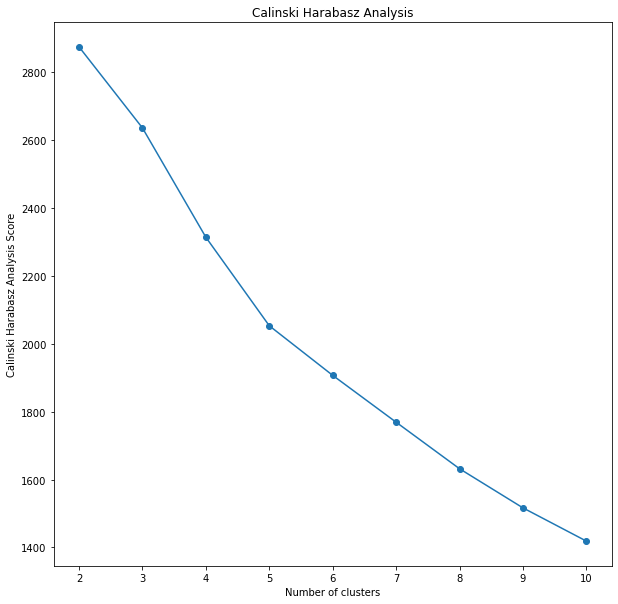

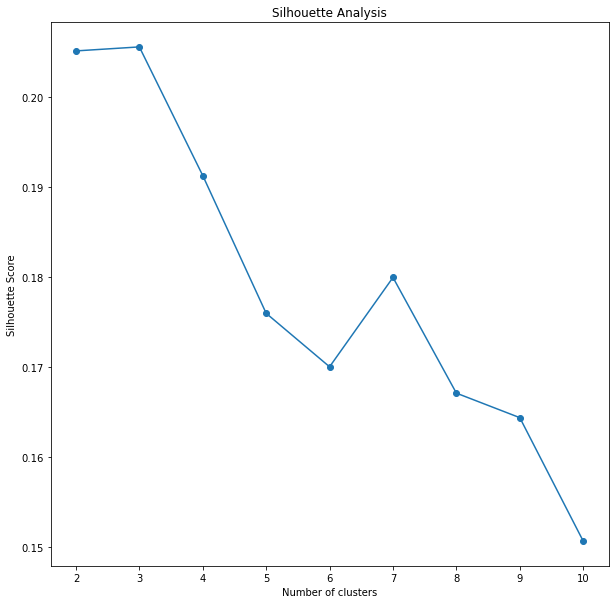

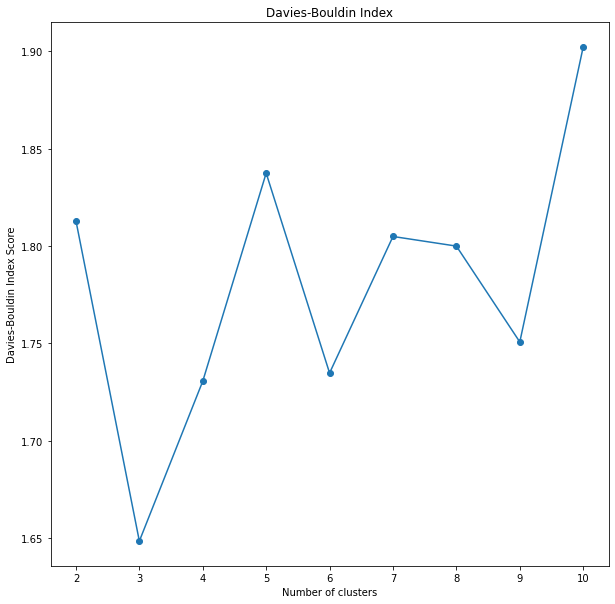

,n_clusters,silhouette_score,calinski_harabasz_score,Davies-Bouldin Index
0,2.0,0.205066,2875.350459,1.812915
1,3.0,0.205510,2636.363257,1.648464
2,4.0,0.191220,2314.099525,1.730552
3,5.0,0.175922,2053.269292,1.837379
4,6.0,0.169982,1907.093786,1.734760
5,7.0,0.179904,1769.002283,1.804855
6,8.0,0.167054,1631.805302,1.799910
7,9.0,0.164330,1516.464860,1.750698
8,10.0,0.150621,1418.467603,1.902178


In [39]:
# set ranges of clusters 
# (the number above 10 is much worse in the score, so we reduce it to 10 clusters to reduce runtime)
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
#create empty append to store scores
scorePca = []
scorePca_2 = []
scorePca_3 = []
B_sil=-10
B_n = -1
B_cal = -10
B_nc = -1
B_db = 10000
B_nd = -1

#
cluster = np.zeros((9,1))
silhouette = np.zeros((9,1))
calinski = np.zeros((9,1))
Davies_Bouldin = np.zeros((9,1))

# for loop to travel every clusters aviliable
for n_clusters in range_n_clusters:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(principalComponents)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(principalComponents, cluster_labels)
    # Compute the scores for calinski and davies_bouldin
    cal = metrics.calinski_harabasz_score(principalComponents, cluster_labels)

    db_baseline = davies_bouldin_score(principalComponents, cluster_labels)
    
    #
    f = n_clusters - 2
    
    #
    cluster[(f),:] = n_clusters
    silhouette[(f),:] = silhouette_avg
    calinski[(f),:] = cal
    Davies_Bouldin[(f),:] = db_baseline

    # select the best cluster in each evaluation method
    if(silhouette_avg>B_sil):
        B_sil = silhouette_avg
        B_n = n_clusters

    if(cal>B_cal):
        B_cal = cal
        B_nc = n_clusters

    if(db_baseline<B_db):
        B_db = db_baseline
        B_nd = n_clusters

    # add scores to appends
    scorePca.append(cal)
    scorePca_2.append(silhouette_avg)
    scorePca_3.append(db_baseline)
    
#
dfcluster = pd.DataFrame(cluster, columns = ['n_clusters'])
dfsilhouette = pd.DataFrame(silhouette, columns = ['silhouette_score'])
dfcalinski = pd.DataFrame(calinski, columns = ['calinski_harabasz_score'])
dfdavies_bouldin_score = pd.DataFrame(Davies_Bouldin, columns = ['Davies-Bouldin Index'])
df1 = pd.concat([dfcluster,dfsilhouette,dfcalinski], axis = 1)
df2 = pd.concat([df1,dfdavies_bouldin_score], axis = 1)
    
# print the best score
print(
    "The best cluster for silhouette is",
    B_n,
    "The score is :",
    B_sil,
    )

print(
    "The best cluster for calinski harabasz is",
    B_nc,
    "The score is :",
    B_cal,
    )

print(
    "The best cluster for Davies-Bouldin Index is",
    B_nd,
    "The score is :",
    B_db,
    )

#Plot the results 
plt.figure(figsize=(10,10))
plt.plot(range_n_clusters, scorePca, marker = 'o')
plt.title('Calinski Harabasz Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski Harabasz Analysis Score')
plt.show()

plt.figure(figsize=(10,10))
plt.plot(range_n_clusters, scorePca_2, marker = 'o')
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

plt.figure(figsize=(10,10))
plt.plot(range_n_clusters, scorePca_3, marker = 'o')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Index Score')
plt.show()

df2


In [40]:
# Fitting k-Means model with optimal number of clusters
# computing cluster quality metrics
# the best cluster in this case is 4, cause both silhouette and Davies-Bouldin show a optimistic view of cluster 3
kmeans = KMeans(n_clusters = 4).fit(principalComponents)
labels = kmeans.labels_

# Number of clusters
pca_clusters = 4

# Cluster Quality Metric #1 - Silhouette Coefficient
sc_pca = metrics.silhouette_score(principalComponents, labels, metric='euclidean')

# Cluster Quality Metric #2 - Calinski-Harabasz Index
ch_pca = metrics.calinski_harabasz_score(principalComponents, labels)

# Cluster Quality Metric #3 - Davies-Bouldin Index
db_pca = davies_bouldin_score(principalComponents, labels)

scores = scores.append({"Model":"PCA k-Means", "Final clusters":pca_clusters, "Silhouette Coefficient":sc_pca, "Calinski-Harabasz Index":ch_pca,
                        "Davies-Bouldin Index":db_pca}, ignore_index = True)
scores

,Model,Final clusters,Silhouette Coefficient,Calinski-Harabasz Index,Davies-Bouldin Index
0,Baseline k-Means,4,0.179381,2122.575239,1.812911
1,PCA k-Means,4,0.191591,2314.042296,1.731323


#### **Finding score for tSNE Kmeans**

The best cluster for silhouette is 11 The score is : 0.3869609
The best cluster for calinski harabasz is 13 The score is : 6128.900670246605
The best cluster for Davies-Bouldin Index is 12 The score is : 0.8641415632061104


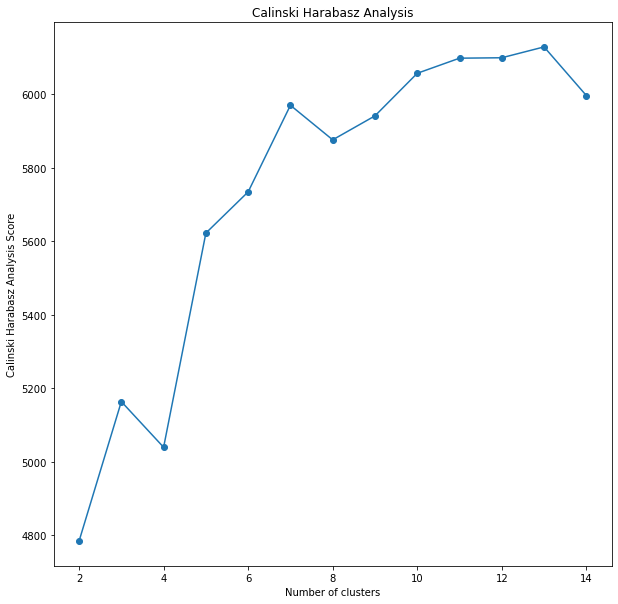

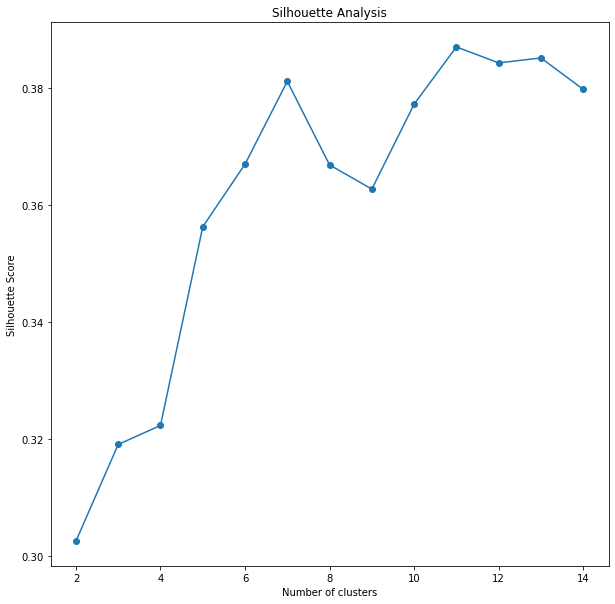

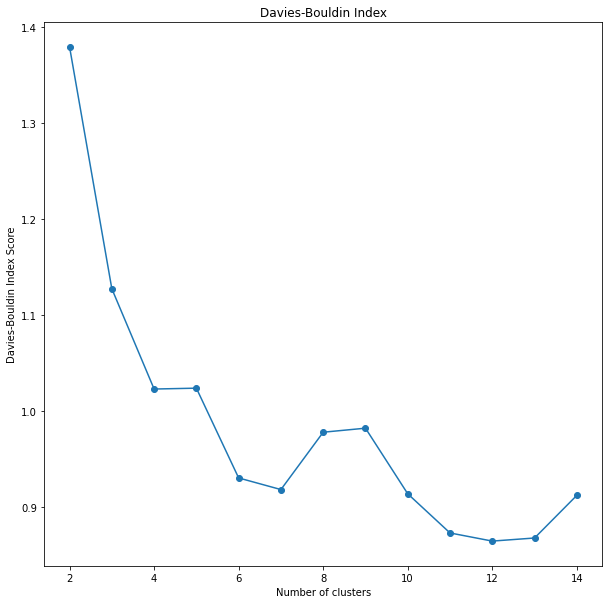

,n_clusters,silhouette_score,calinski_harabasz_score,Davies-Bouldin Index
0,2.0,0.302484,4784.586049,1.379414
1,3.0,0.319007,5164.043277,1.127244
2,4.0,0.322251,5039.828953,1.022688
3,5.0,0.356210,5622.501260,1.023597
4,6.0,0.366920,5734.591155,0.929974
5,7.0,0.381072,5970.123891,0.917868
6,8.0,0.366783,5876.136535,0.977661
7,9.0,0.362660,5941.313712,0.981862
8,10.0,0.377174,6057.128606,0.913436
9,11.0,0.386961,6098.231988,0.872621


In [41]:
# set ranges of clusters 
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
#create empty append to store scores
scoreTsne = []
scoreTsne_2 = []
scoreTsne_3 = []

B_sil = -10
B_n = -1
B_cal = -10
B_nc = -1
B_db = 10000
B_nd = -1

#
cluster = np.zeros((13,1))
silhouette = np.zeros((13,1))
calinski = np.zeros((13,1))
Davies_Bouldin = np.zeros((13,1))

# for loop to travel every clusters aviliable
for n_clusters in range_n_clusters:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(tsne_processed)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(tsne_processed, cluster_labels)
    # Compute the scores for calinski and davies_bouldin
    cal = metrics.calinski_harabasz_score(tsne_processed, cluster_labels)

    db_baseline = davies_bouldin_score(tsne_processed, cluster_labels)
    
    #
    f = n_clusters - 2
    
    #
    cluster[(f),:] = n_clusters
    silhouette[(f),:] = silhouette_avg
    calinski[(f),:] = cal
    Davies_Bouldin[(f),:] = db_baseline

    # select the best cluster in each evaluation method
    if(silhouette_avg>B_sil):
        B_sil = silhouette_avg
        B_n = n_clusters

    if(cal>B_cal):
        B_cal = cal
        B_nc = n_clusters

    if(db_baseline<B_db):
        B_db = db_baseline
        B_nd = n_clusters

    # add scores to appends
    scoreTsne.append(cal)
    scoreTsne_2.append(silhouette_avg)
    scoreTsne_3.append(db_baseline)
    
#
dfcluster = pd.DataFrame(cluster, columns = ['n_clusters'])
dfsilhouette = pd.DataFrame(silhouette, columns = ['silhouette_score'])
dfcalinski = pd.DataFrame(calinski, columns = ['calinski_harabasz_score'])
dfdavies_bouldin_score = pd.DataFrame(Davies_Bouldin, columns = ['Davies-Bouldin Index'])
df1 = pd.concat([dfcluster,dfsilhouette,dfcalinski], axis = 1)
df2 = pd.concat([df1,dfdavies_bouldin_score], axis = 1)
    
# print the best score
print(
    "The best cluster for silhouette is",
    B_n,
    "The score is :",
    B_sil,
    )

print(
    "The best cluster for calinski harabasz is",
    B_nc,
    "The score is :",
    B_cal,
    )

print(
    "The best cluster for Davies-Bouldin Index is",
    B_nd,
    "The score is :",
    B_db,
    )


#Plot the results 
plt.figure(figsize=(10,10))
plt.plot(range_n_clusters, scoreTsne, marker = 'o')
plt.title('Calinski Harabasz Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski Harabasz Analysis Score')
plt.show()

plt.figure(figsize=(10,10))
plt.plot(range_n_clusters, scoreTsne_2, marker = 'o')
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

plt.figure(figsize=(10,10))
plt.plot(range_n_clusters, scoreTsne_3, marker = 'o')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Index Score')
plt.show()

df2


In [42]:
# Fitting t-SNE based k-Means model with optimal number of clusters 
# computing cluster quality metrics
# the best cluster in this case is 13, cause both calinski and davis shown a optimistic view of this cluster
kmeans = KMeans(n_clusters = 13).fit(tsne_processed)
labels = kmeans.labels_

#Number of clusters
tsne_clusters = 13

# Cluster Quality Metric #1 - Silhouette Coefficient
sc_tsne = metrics.silhouette_score(tsne_processed, labels, metric='euclidean')

# Cluster Quality Metric #2 - Calinski-Harabasz Index
ch_tsne = metrics.calinski_harabasz_score(tsne_processed, labels)

# Cluster Quality Metric #3 - Davies-Bouldin Index
db_tsne = davies_bouldin_score(tsne_processed, labels)

scores = scores.append({"Model":"t-SNE k-Means", "Final clusters":tsne_clusters, "Silhouette Coefficient":sc_tsne, "Calinski-Harabasz Index":ch_tsne,
                        "Davies-Bouldin Index":db_tsne}, ignore_index = True)
scores

,Model,Final clusters,Silhouette Coefficient,Calinski-Harabasz Index,Davies-Bouldin Index
0,Baseline k-Means,4,0.179381,2122.575239,1.812911
1,PCA k-Means,4,0.191591,2314.042296,1.731323
2,t-SNE k-Means,13,0.385083,6128.799212,0.867384


#### **Finding score for Manifold Learning Kmeans**

The best cluster for silhouette is 6 The score is : 0.5167468786276322
The best cluster for calinski harabasz is 8 The score is : 16673.6787914754
The best cluster for Davies-Bouldin Index is 6 The score is : 0.6620726660859465


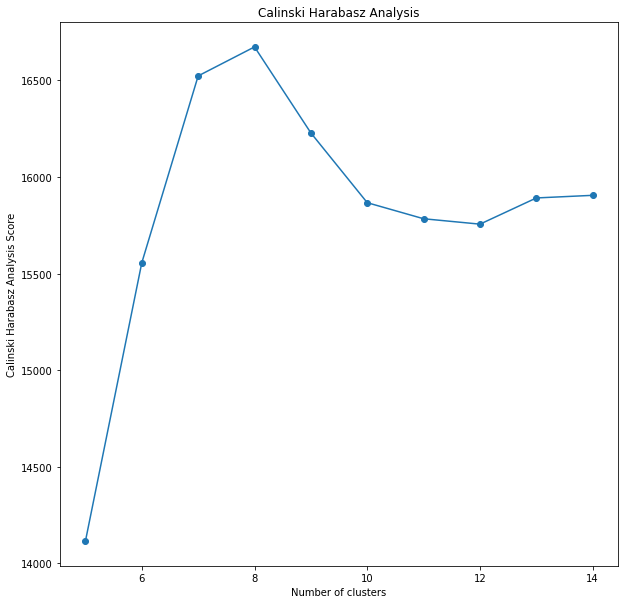

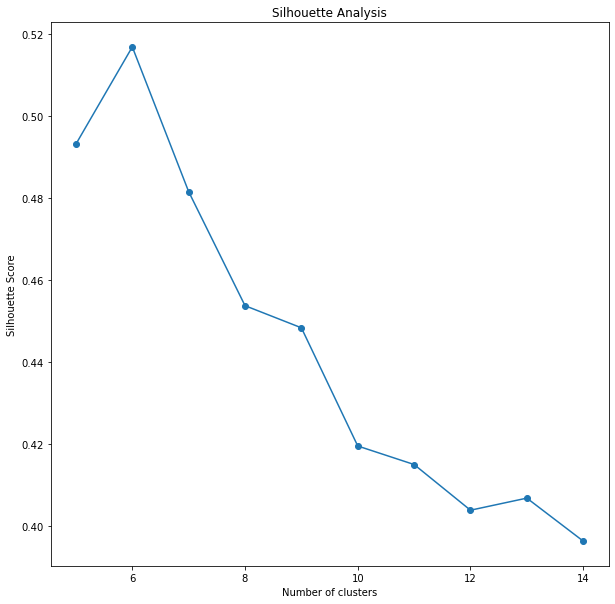

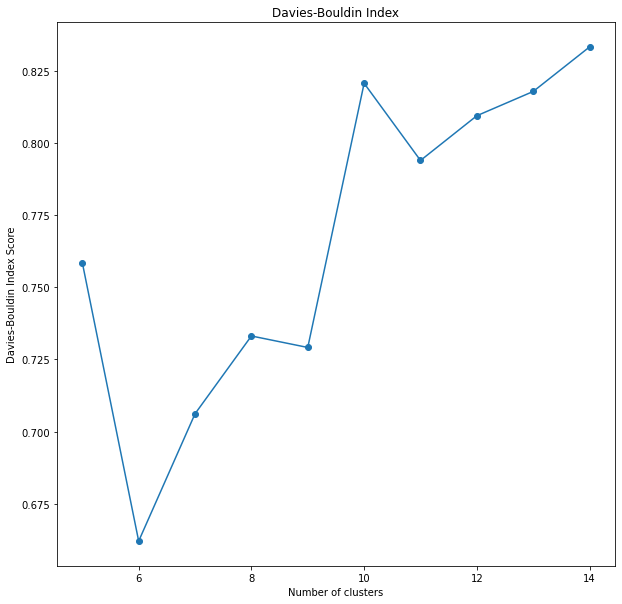

,n_clusters,silhouette_score,calinski_harabasz_score,Davies-Bouldin Index
0,5.0,0.493055,14114.700698,0.758534
1,6.0,0.516747,15556.061514,0.662073
2,7.0,0.481451,16523.473872,0.706183
3,8.0,0.453652,16673.678791,0.733138
4,9.0,0.448258,16228.130412,0.729157
5,10.0,0.419441,15866.955875,0.820687
6,11.0,0.414925,15783.819605,0.793949
7,12.0,0.403787,15755.893057,0.809451
8,13.0,0.406735,15891.560887,0.817855
9,14.0,0.396257,15905.130628,0.833291


In [43]:
# set ranges of clusters 
# the cluster 2, 3, 4 was cut because it is too far away from the true value of cluster
# and Manifold Learning algorithm can got a better calculation without the first three clusters
range_n_clusters = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
#create empty append to store scores
score_ml = []
score_ml_2 = []
score_ml_3 = []

#
B_sil=-10
B_n = -1
B_cal = -10
B_nc = -1
B_db = 10000
B_nd = -1

#
cluster = np.zeros((10,1))
silhouette = np.zeros((10,1))
calinski = np.zeros((10,1))
Davies_Bouldin = np.zeros((10,1))

# for loop to travel every clusters aviliable
for n_clusters in range_n_clusters:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(ml_processed)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(ml_processed, cluster_labels)
    # Compute the scores for calinski and davies_bouldin
    cal = metrics.calinski_harabasz_score(ml_processed, cluster_labels)

    db_baseline = davies_bouldin_score(ml_processed, cluster_labels)
    
    #
    f = n_clusters - 5
    
    #
    cluster[(f),:] = n_clusters
    silhouette[(f),:] = silhouette_avg
    calinski[(f),:] = cal
    Davies_Bouldin[(f),:] = db_baseline

    # select the best cluster in each evaluation method
    if(silhouette_avg>B_sil):
        B_sil = silhouette_avg
        B_n = n_clusters

    if(cal>B_cal):
        B_cal = cal
        B_nc = n_clusters

    if(db_baseline<B_db):
        B_db = db_baseline
        B_nd = n_clusters

    # add scores to appends
    score_ml.append(cal)
    score_ml_2.append(silhouette_avg)
    score_ml_3.append(db_baseline)
    
#
dfcluster = pd.DataFrame(cluster, columns = ['n_clusters'])
dfsilhouette = pd.DataFrame(silhouette, columns = ['silhouette_score'])
dfcalinski = pd.DataFrame(calinski, columns = ['calinski_harabasz_score'])
dfdavies_bouldin_score = pd.DataFrame(Davies_Bouldin, columns = ['Davies-Bouldin Index'])
df1 = pd.concat([dfcluster,dfsilhouette,dfcalinski], axis = 1)
df2 = pd.concat([df1,dfdavies_bouldin_score], axis = 1)
    
# print the best score
print(
    "The best cluster for silhouette is",
    B_n,
    "The score is :",
    B_sil,
    )

print(
    "The best cluster for calinski harabasz is",
    B_nc,
    "The score is :",
    B_cal,
    )

print(
    "The best cluster for Davies-Bouldin Index is",
    B_nd,
    "The score is :",
    B_db,
    )


#Plot the results 
plt.figure(figsize=(10,10))
plt.plot(range_n_clusters, score_ml, marker = 'o')
plt.title('Calinski Harabasz Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski Harabasz Analysis Score')
plt.show()

plt.figure(figsize=(10,10))
plt.plot(range_n_clusters, score_ml_2, marker = 'o')
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

plt.figure(figsize=(10,10))
plt.plot(range_n_clusters, score_ml_3, marker = 'o')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Index Score')
plt.show()

df2

In [44]:
# Fitting ICA based k-Means model with optimal number of clusters
# computing cluster quality metrics
# # the best cluster in this case is 6, cause both silhouette and davis shown a optimistic view of this cluster
kmeans = KMeans(n_clusters = 6).fit(ml_processed)
labels = kmeans.labels_

#Number of clusters
ml_clusters = 6

# Cluster Quality Metric #1 - Silhouette Coefficient
sc_ica = metrics.silhouette_score(ml_processed, labels, metric='euclidean')

# Cluster Quality Metric #2 - Calinski-Harabasz Index
ch_ica = metrics.calinski_harabasz_score(ml_processed, labels)

# Cluster Quality Metric #3 - Davies-Bouldin Index
db_ica = davies_bouldin_score(ml_processed, labels)

scores = scores.append({"Model":"Manifold Learning", "Final clusters":ml_clusters,"Silhouette Coefficient":sc_ica, 
                        "Calinski-Harabasz Index":ch_ica,
                        "Davies-Bouldin Index":db_ica}, ignore_index = True)
scores

,Model,Final clusters,Silhouette Coefficient,Calinski-Harabasz Index,Davies-Bouldin Index
0,Baseline k-Means,4,0.179381,2122.575239,1.812911
1,PCA k-Means,4,0.191591,2314.042296,1.731323
2,t-SNE k-Means,13,0.385083,6128.799212,0.867384
3,Manifold Learning,6,0.516747,15556.061514,0.662073


In [45]:
# Give as many comments as you can to explain the purposes of your code.
# You may want to use multiple cells if necessary. 
# Silhouette Coefficient : the greater the better
#https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c
# Calinski-Harabasz Index : 
# https://stats.stackexchange.com/questions/52838/what-is-an-acceptable-value-of-the-calinski-harabasz-ch-criterion
# Davies-Bouldin Index : 
# https://gdcoder.com/silhouette-analysis-vs-elbow-method-vs-davies-bouldin-index-selecting-the-optimal-number-of-clusters-for-kmeans-clustering/



scores

,Model,Final clusters,Silhouette Coefficient,Calinski-Harabasz Index,Davies-Bouldin Index
0,Baseline k-Means,4,0.179381,2122.575239,1.812911
1,PCA k-Means,4,0.191591,2314.042296,1.731323
2,t-SNE k-Means,13,0.385083,6128.799212,0.867384
3,Manifold Learning,6,0.516747,15556.061514,0.662073


### Appendix
Put under this section any customised Python functions and classes that you constructed and used in this notebook. The code in the section are supposed to be ran after loading the packages.  